In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
df =pd.read_csv('data.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Data Cleaning

In [4]:
#write the columns names in small letter and replace spaces with under score
df.columns=df.columns.str.lower().str.replace(' ','_')

In [5]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [6]:
strings =list(df.dtypes[df.dtypes=='object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [10]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [11]:
df.fillna(0,inplace=True)
df.rename(columns={'msrp': 'price'}, inplace =True)

In [12]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
price                0
dtype: int64

In [13]:
df.transmission_type.value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

In [14]:
# tnaere are missing values in the transmissioin type culumn reolace with mode
df['transmission_type'] = df['transmission_type'].replace('unknown','automatic') 

In [15]:
df.transmission_type.value_counts()

automatic           8285
manual              2935
automated_manual     626
direct_drive          68
Name: transmission_type, dtype: int64

In [16]:
numerical_features = df[['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg' ]]

In [17]:
corrolation_matrix=numerical_features.corr()

In [18]:

max_corr = corrolation_matrix.abs().unstack().sort_values(ascending=False)
top_corr =max_corr[max_corr < 1].head(2)

print(top_corr)

city_mpg     highway_mpg    0.886829
highway_mpg  city_mpg       0.886829
dtype: float64


In [19]:
 mean_price = df['price'].mean()

In [20]:
df['above_average'] = (df['price']>mean_price).astype(int)

In [21]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,above_average
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,1
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650,1
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350,0
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450,0
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500,0


# Setting up Validation Frame Work

In [22]:
# perfom train/validation/test using sklearn
from sklearn.model_selection import train_test_split

In [23]:
# divide the data into train,validation,test
df_full_train, df_test =train_test_split(df, test_size = 0.2, random_state=42 )

In [24]:
len(df_full_train), len(df_test)

(9531, 2383)

In [25]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [26]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [27]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_train = df_test.reset_index(drop=True)

In [28]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [29]:
del df_train['above_average']
del df_test['above_average']
del df_val['above_average']

In [30]:
del df_train['price']
del df_val['price']
del df_test['price']

# Data Analysis

In [31]:
df_full_train = df_full_train.reset_index(drop=True)

In [32]:
# calculate the global churn rate
df_full_train.above_average.value_counts(normalize = True)

0    0.723219
1    0.276781
Name: above_average, dtype: float64

In [33]:
global_above_average_rate = df_full_train.above_average.mean()
round(global_above_average_rate, 2)

0.28

In [34]:
df_full_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
price                  int64
above_average          int32
dtype: object

In [35]:
df_full_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'price', 'above_average'],
      dtype='object')

In [36]:
categorical = ['make','model','engine_fuel_type', 'transmission_type','driven_wheels',
               'market_category', 'vehicle_size', 'vehicle_style', 'year','number_of_doors',]

In [37]:
numerical = ['popularity', 'highway_mpg', 'city_mpg', 'engine_cylinders', 'engine_hp' ]

In [38]:
categorical_features =['make','model','transmission_type','vehicle_style','year','vehicle_size','driven_wheels']

# Mutual Information

In [39]:
# mutual information : concept from information theory that tells us how much we can learn about one variable if we know
#the value of another
from sklearn.metrics import mutual_info_score

In [40]:
mutual_info_score(df_full_train.above_average, df_full_train.make)

0.2387236479073192

In [41]:
mutual_info_score(df_full_train.above_average, df_full_train.model)

0.46099440756035703

In [42]:
mutual_info_score(df_full_train.above_average, df_full_train.transmission_type)

0.020261528648380385

In [43]:
mutual_info_score(df_full_train.above_average, df_full_train.vehicle_style)

0.08339022741593435

In [44]:
mutual_info_score(df_full_train.above_average, df_full_train.vehicle_style)

0.08339022741593435

In [45]:
# apply mutual info to the whole data
def mutual_info_above_average_score(series):
    return mutual_info_score(series, df_full_train.above_average)

In [46]:
mi = df_full_train[categorical_features].apply(mutual_info_above_average_score)

In [47]:
# sort by des
mi.sort_values(ascending = False)

model                0.460994
make                 0.238724
driven_wheels        0.104139
vehicle_style        0.083390
year                 0.073605
vehicle_size         0.042072
transmission_type    0.020262
dtype: float64

# One hot Encoding

In [48]:
# use one hot encoding for categorical variables
from sklearn.feature_extraction import DictVectorizer

In [49]:
train_dicts = df_train.to_dict(orient='records')

In [50]:
train_dicts[0]

{'make': 'gmc',
 'model': 'envoy_xl',
 'year': 2005,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 275.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'rear_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 0,
 'vehicle_size': 'large',
 'vehicle_style': '4dr_suv',
 'highway_mpg': 18,
 'city_mpg': 13,
 'popularity': 549}

In [51]:
dv = DictVectorizer(sparse=False)

In [52]:
X_train = dv.fit_transform(train_dicts)

In [53]:
val_dicts = df_val.to_dict(orient='records')

In [54]:
X_val = dv.transform(val_dicts)

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [57]:
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [58]:
model.intercept_[0]

-0.24616819013863156

In [59]:
# this is our w(weight)
model.coef_[0].round(3)

array([ 1.000e-02,  6.170e-01,  2.650e-01, -5.540e-01, -5.740e-01,
       -4.170e-01,  8.670e-01,  1.242e+00,  9.500e-02,  1.240e-01,
       -2.768e+00,  4.666e+00, -1.232e+00, -4.030e-01, -2.836e+00,
        5.000e-02,  8.300e-02,  1.054e+00,  8.630e-01,  2.873e+00,
        1.010e-01,  1.061e+00,  3.900e-02,  2.677e+00, -1.032e+00,
       -5.760e-01, -3.340e+00,  7.460e-01, -1.940e-01, -1.844e+00,
       -4.850e-01, -1.391e+00, -4.790e-01, -1.951e+00, -1.082e+00,
        2.580e-01,  2.000e-03,  1.598e+00,  2.107e+00,  1.487e+00,
        1.400e-02,  9.620e-01,  0.000e+00, -2.347e+00,  0.000e+00,
        4.460e-01, -1.055e+00,  9.500e-02, -8.130e-01, -2.300e-02,
       -1.833e+00,  1.683e+00,  1.156e+00, -5.010e-01, -1.020e-01,
       -3.019e+00, -1.064e+00,  9.110e-01,  7.260e-01, -1.310e-01,
        2.157e+00,  0.000e+00,  6.360e-01,  1.521e+00,  0.000e+00,
        4.000e-02, -6.200e-02,  3.870e-01, -3.100e-02,  7.000e-03,
       -7.320e-01, -1.610e-01,  1.856e+00, -1.500e-02,  9.790e

In [60]:
# hard prediction predict 0 and 1
model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 1])

In [61]:
# soft probability predict likelyhood of churning
model.predict_proba(X_train)

array([[9.66913072e-01, 3.30869278e-02],
       [9.99716389e-01, 2.83610725e-04],
       [9.69758784e-01, 3.02412163e-02],
       ...,
       [9.98582643e-01, 1.41735731e-03],
       [9.99915650e-01, 8.43504034e-05],
       [3.92542956e-02, 9.60745704e-01]])

In [62]:
# using it on valitaton dataset
y_pred =model.predict_proba(X_val)[:,1]

In [63]:
above_average_decision = (y_pred >= 0.5)

In [64]:
# check the accuracy of the model
accuracy = (y_val == above_average_decision).mean()

In [65]:
print(round(accuracy,2))

0.94


In [66]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] =above_average_decision.astype(int)
df_pred['actual'] = y_val

In [67]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [68]:
df_pred

,probability,prediction,actual,correct
0,0.000664,0,0,True
1,0.999545,1,1,True
2,0.000008,0,0,True
3,0.261063,0,0,True
4,0.000124,0,0,True
...,...,...,...,...
2378,0.000093,0,0,True
2379,0.000503,0,0,True
2380,0.000005,0,0,True
2381,0.998479,1,1,True


In [69]:
len(X_val)

2383

In [70]:
(y_val == above_average_decision).sum()

2240

In [71]:
2240/2383

0.9399916072177927

In [72]:
thresholds = np.linspace(0, 1,21)

scores= []
for t in thresholds:
    above_average_decision =(y_pred >=t)
    score = (y_val == above_average_decision).mean()
    print('%.2f%.3f'%(t,score))
    scores.append(score)

0.000.277
0.050.892
0.100.909
0.150.917
0.200.920
0.250.928
0.300.936
0.350.936
0.400.939
0.450.940
0.500.940
0.550.940
0.600.940
0.650.941
0.700.940
0.750.940
0.800.937
0.850.931
0.900.920
0.950.896
1.000.723


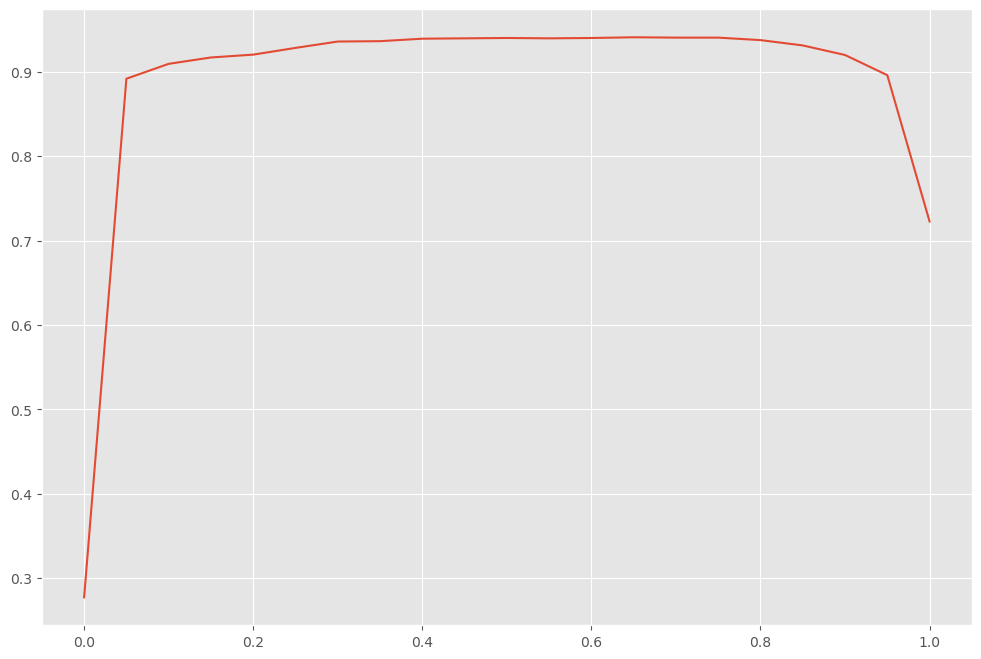

In [73]:
plt.plot(thresholds, scores)

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_val,y_pred >=0.65)

0.9408308854385229

In [76]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt

In [78]:
df['price'] = np.log1p(df[['price']])

In [79]:
selected_columns= ['make','model','engine_fuel_type', 'transmission_type','driven_wheels','market_category', 'vehicle_size', 'vehicle_style', 'year',
                 'number_of_doors','popularity', 'highway_mpg', 'city_mpg', 'engine_cylinders', 'engine_hp','price']

In [80]:
data=df[selected_columns]


In [81]:
X= data.drop(columns=['price'])
y = data['price']

In [82]:
X_train, X_val, y_train, _y_val= train_test_split(X, y, test_size=0.2, random_state =42)

In [83]:
X_train_dict = X_train.to_dict(orient='records')
X_val_dict = X_val.to_dict(orient='records')

In [84]:
vectorizer =DictVectorizer(sparse=False)
X_train_encoded = vectorizer.fit_transform(X_train_dict)
X_val_encoded = vectorizer.transform(X_val_dict)

In [85]:
alpha_values = [0, 0.01, 0.1, 1, 10]

In [86]:
rmse_score = {}

In [87]:
for alpha in alpha_values:
    model = Ridge(alpha=alpha,solver='sag', random_state=42)
    model.fit(X_train_encoded, y_train)

In [88]:
y_pred = model.predict(X_val_encoded)

In [89]:
rmse =round(sqrt(mean_squared_error(y_val,y_pred)),3)
rmse_score[alpha]= rmse

In [90]:
for alpha, rmse in rmse_score.items():
    print(f'Alpha={alpha}: RMSE ={rmse}')

Alpha=10: RMSE =9.89
